In [48]:
import numpy as np
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [35]:
reads = pd.read_csv("goodreads_history.csv")
reads

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,18749286,How to Get Rich: One of the World's Greatest E...,Felix Dennis,"Dennis, Felix",NaN,"=""""","=""""",0,4.20,Portfolio,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,34376766,"Blood, Sweat, and Pixels: The Triumphant, Turb...",Jason Schreier,"Schreier, Jason",NaN,"=""""","=""""",0,4.23,Harper Paperbacks,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,13530973,Antifragile: Things That Gain from Disorder,Nassim Nicholas Taleb,"Taleb, Nassim Nicholas",NaN,"=""1400067820""","=""9781400067824""",5,4.08,Random House,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,45697427,Dark Matter,Blake Crouch,"Crouch, Blake",NaN,"=""""","=""""",0,4.10,Ballantine Books,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,42041926,The Scout Mindset: Why Some People See Things ...,Julia Galef,"Galef, Julia",NaN,"=""0735217556""","=""9780735217553""",0,4.33,Portfolio,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,4122,Built to Last: Successful Habits of Visionary ...,James C. Collins,"Collins, James C.",Jerry I. Porras,"=""0060566108""","=""9780060566104""",5,4.03,Harper Business,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
317,2612,The Tipping Point: How Little Things Can Make ...,Malcolm Gladwell,"Gladwell, Malcolm",NaN,"=""0316346624""","=""9780316346627""",4,3.98,Back Bay Books,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
318,9418327,Bossypants,Tina Fey,"Fey, Tina",NaN,"=""""","=""""",5,3.95,Reagan Arthur Books,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
319,6516450,What the Dog Saw and Other Adventures,Malcolm Gladwell,"Gladwell, Malcolm",NaN,"=""0316078573""","=""9780316078573""",3,3.85,"Little, Brown and Company",...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [36]:
reads.info

<bound method DataFrame.info of       Book Id                                              Title  \
0    18749286  How to Get Rich: One of the World's Greatest E...   
1    34376766  Blood, Sweat, and Pixels: The Triumphant, Turb...   
2    13530973        Antifragile: Things That Gain from Disorder   
3    45697427                                        Dark Matter   
4    42041926  The Scout Mindset: Why Some People See Things ...   
..        ...                                                ...   
316      4122  Built to Last: Successful Habits of Visionary ...   
317      2612  The Tipping Point: How Little Things Can Make ...   
318   9418327                                         Bossypants   
319   6516450              What the Dog Saw and Other Adventures   
320      1202  Freakonomics: A Rogue Economist Explores the H...   

                    Author              Author l-f Additional Authors  \
0             Felix Dennis           Dennis, Felix                NaN   
1    

In [37]:
reads["Year"] = pd.DatetimeIndex(reads["Date Read"]).year
reads["Year"] = reads["Year"].astype(float)
reads["Year"]

0      2021.0
1         NaN
2      2021.0
3      2021.0
4         NaN
        ...  
316       NaN
317       NaN
318       NaN
319       NaN
320       NaN
Name: Year, Length: 321, dtype: float64

In [38]:
reads["Year"].value_counts()

Year
2020.0    71
2019.0    48
2021.0    19
2018.0     1
Name: count, dtype: int64

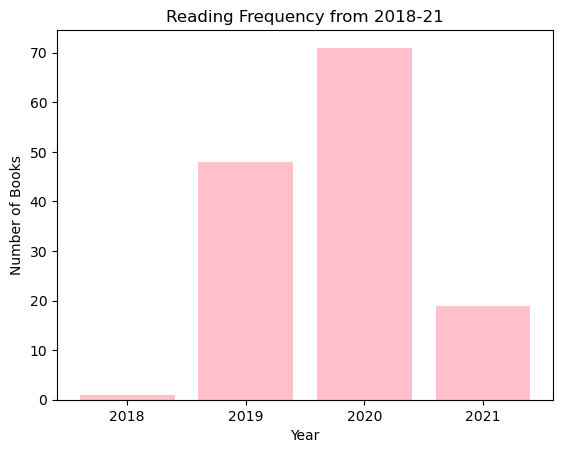

In [39]:
Years = ["2018", "2019", "2020", "2021"]
Books = [1, 48, 71, 19]

df = pd.DataFrame(list(zip(Years, Books)), columns= ['Years', 'Books'])

plt.bar(df['Years'], df['Books'], color = 'pink');
plt.ylabel('Number of Books');
plt.xlabel('Year');
plt.title('Reading Frequency from 2018-21');

In [40]:
reads["Date Added"] = pd.to_datetime(reads['Date Added'])
reads["Date Added"].dtype

dtype('<M8[ns]')

In [41]:
reads["Date Read"] = pd.to_datetime(reads['Date Read'])
reads["Date Read"].dtype

dtype('<M8[ns]')

In [42]:
reads["reading_time"] = reads["Date Read"] - reads["Date Added"]
reads["reading_time"]

0      45 days
1          NaT
2     903 days
3       4 days
4          NaT
        ...   
316        NaT
317        NaT
318        NaT
319        NaT
320        NaT
Name: reading_time, Length: 321, dtype: timedelta64[ns]

In [43]:
reads["reading_time"] = reads["reading_time"].dt.days.astype(float)
reads["reading_time"] = abs(reads["reading_time"])

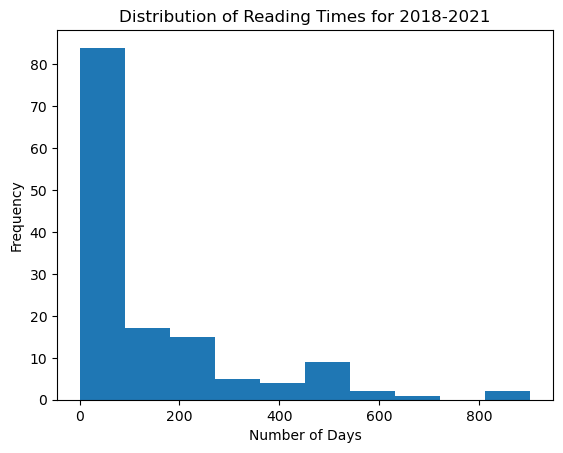

In [52]:
plt.hist(reads['reading_time'])
plt.xlabel("Number of Days")
plt.ylabel("Frequency")
plt.title("Distribution of Reading Times for 2018-2021");

In [45]:
np.mean(reads["reading_time"])

131.9640287769784

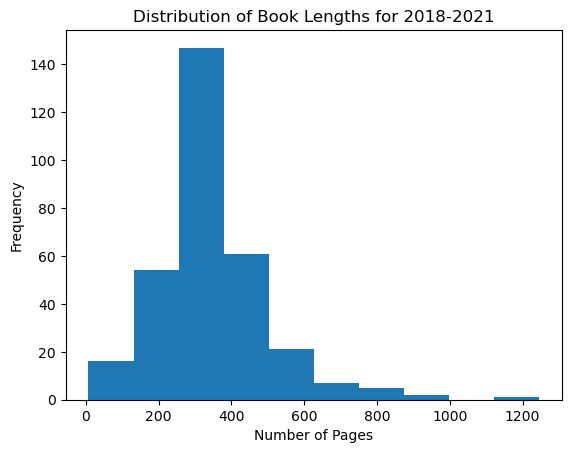

In [51]:
plt.hist(reads["Number of Pages"])
plt.xlabel("Number of Pages")
plt.ylabel("Frequency")
plt.title("Distribution of Book Lengths for 2018-2021");

In [50]:
np.mean(reads["Number of Pages"])

346.515923566879

In [55]:
years = pd.DataFrame()
years["Year"] = reads["Year Published"].dropna()
years["Year"] = years["Year"].astype(int)

In [56]:
years["Age"] = 2023 - years["Year"]
years["Age"]

0      15
1       6
2      11
3       7
4       2
       ..
316    19
317    21
318    12
319    14
320    17
Name: Age, Length: 312, dtype: int64

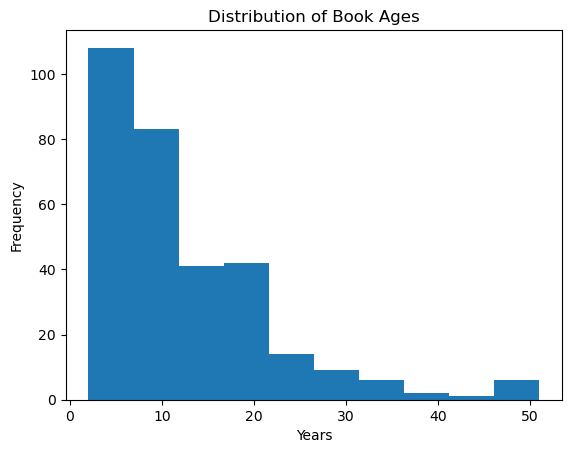

In [57]:
plt.hist(years["Age"])
plt.title("Distribution of Book Ages")
plt.xlabel("Years")
plt.ylabel("Frequency");

In [59]:
np.mean(years["Age"])

11.987179487179487